<a href="https://colab.research.google.com/github/bhushanyadav07/Final-Project/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [0]:
model = MobileNet(weights='imagenet',include_top=True)

In [23]:

model.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

'___________________________________________________________________________________________'

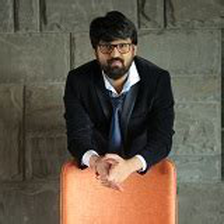

[834]
('n04350905', 'suit', 0.64139295)
('n03680355', 'Loafer', 0.19140248)
('n04591157', 'Windsor_tie', 0.023118999)
('n03937543', 'pill_bottle', 0.017876064)
('n02948072', 'candle', 0.011390634)


'___________________________________________________________________________________________'

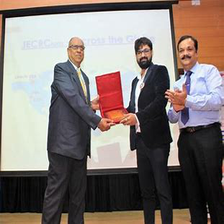

[630]
('n03680355', 'Loafer', 0.64201677)
('n04350905', 'suit', 0.07914519)
('n02701002', 'ambulance', 0.028935079)
('n04258138', 'solar_dish', 0.027282314)
('n06359193', 'web_site', 0.023791814)


'___________________________________________________________________________________________'

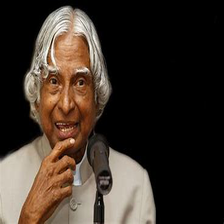

[903]
('n04584207', 'wig', 0.7591829)
('n03630383', 'lab_coat', 0.049424745)
('n04591157', 'Windsor_tie', 0.024909317)
('n04209133', 'shower_cap', 0.015147557)
('n02865351', 'bolo_tie', 0.012891396)


In [24]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://th.bing.com/th/id/OIP.f6ZwSG1gU6j2YKaJQEMd6AAAAA?w=147&h=152&c=7&o=5&dpr=1.25&pid=1.7",
    "https://th.bing.com/th/id/OIP.zh5NmdTzAughWaAkOrZypgHaGR?w=249&h=200&c=7&o=5&dpr=1.25&pid=1.7",
        'https://th.bing.com/th/id/OIP.Br6n6nYaTuH7OXqEnn1sgwHaEo?w=295&h=184&c=7&o=5&dpr=1.25&pid=1.7'
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))

    lst = decode_predictions(pred, top=5)
    for itm in lst[0]:
        print(itm)

##Transfer Learning

In [25]:
base_model=MobileNet(weights='imagenet',include_top=False) 
#imports the mobilenet model and discards the last 1000 neuron layer.

base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 

In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
preds=Dense(3,activation='softmax')(x)

In [0]:
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

####Note : Some Part is still remaining i'm still working on it 